# Help English: A Simple Yet Illuminating Data Analisys of a Private Language School
## Defining the Persona and Gaining Insight into the Students of Help English

<img src="image_repository/storytelling_helpenglish/logo_cortado.png" style="width:400px; display:block; margin:auto; padding:10px;"/>



## Introduction

Help English is a private language school that was once located in Santo André, São Paulo. While it originally operated with in-person classes, after the COVID-19 Pandemic of 2020, the school has transitioned to offering exclusively online classes. At Help English, students have the flexibility to choose the frequency and timing of their classes, with options for 2, 3, or even 4 sessions per week. Classes can be conducted in small groups of up to four people, or more commonly, as individual sessions, where a single student interacts directly with a teacher in an online meeting via platforms like Google Meet or Zoom. The primary instructional material used is the English File 4th Edition from Oxford University Press.

As the school expanded, the necessity for systematic data collection and storage became increasingly evident. Although Help English was established in 2016, it wasn't until 2023 that the school began to gather and analyze data comprehensively. Thus, the data referenced in this article pertains, mostly, to the years 2023 and 2024.

This analysis seeks to answer two pivotal questions:

<p><strong>1 - "Who is the typical student at Help English?"<br>2 - "How can this information enhance the marketing strategies?"</strong></p>

By addressing these questions, we aim to understand our student demographics better and tailor our marketing efforts to attract and retain the right audience, ultimately fostering the school's growth and success.

Disclaimer: certain columns will not be displayed here due to the sensitive nature of the data they contain about students.

### Now, into the Analysis:

In [1]:
# Used libraries for datasets
import numpy as np
import json
import pandas as pd
import requests
from datetime import datetime

# To visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# To make plots
import matplotlib.pyplot as plt
import seaborn as sns

# To change plot style
sns.set(style="darkgrid")

# To ignore warnings as "descontinued functions"
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
df_helpenglish = pd.read_csv('helpenglish_data.csv')

In [3]:
# Removing sensitive data and clutter
columns_to_remove = [
    'Unnamed: 0', 'Unnamed: 1', 
    'How did you encountered Help English?',
    "What's your full name?",
    "What's your zipcode?",
    'Qual seu número de celular? (com DDD, por favor)', 
    'Qual seu RG?', 'Qual seu CPF?', 
    'Qual seu endereço completo? No esqueça de adicionar os complementos (apartamento, casa, cidade etc).'
]

df_clean = df_helpenglish.drop(columns=columns_to_remove)

In [4]:
# Displaying a sample of the filtered dataframe
df_clean.head()

,Have you studied English before?,How do you identify yourself?,What's your birthday?,From what region of Brazil are you from?,Do you know who your teacher will be?,Prefered payment method,What's your occupation?,Wage average (by occupation),Course withdrawal date
0,No,Woman,14/08/1994,Southeast,Teacher Eduardo,PIX,Education,"R$ 2.886,24",NaN
1,No,Man,13/05/1994,Southeast,Teacher Eduardo,PIX,Engineering,"R$ 6.815,10",NaN
2,Yes,Woman,21/06/1998,Southeast,Teacher Eduardo,PIX,Marketing,"R$ 3.400,00",NaN
3,No,Woman,15/01/2002,Southeast,Teacher Juliana,PIX,Business,"R$ 3.094,00",NaN
4,Yes,Woman,19/05/2003,Southeast,Teacher Eduardo,PIX,Marketing,"R$ 3.400,00",NaN


As mentioned above, some columns were removed, like: full name, ID numbers, zipcode, phone numbers and addresses.

#### What is expected from each column?

<strong>Have you studied English before?</strong> - Yes / No

<strong>How do you identify yourself?</strong> - Woman / Man / Others

<strong>What's your birthday?</strong> - Brazilian date Format dd/mm/yyyy

<strong>From what region of Brazil are you from?</strong> - Southeast / north / south / soutwest / northeast / northwest / I'm not from Brazil

<strong>Do you know who your teacher will be?</strong> - Teacher Eduardo / Teacher Juliana / Teacher Mônica / Teacher Rejane / Teacher Isabella

<strong>Prefered payment method</strong> - PIX / Boleto bancário (Brazilian billing format) / Other

<strong>What's your occupation?</strong> - Architecture / Art & Design  / Business  / Communication / Customer Service / Education / Engineering / Environmental Science / Finance / Health / Human Resources / I don’t work / Industrial Area / Law / Logistics / Marketing / Not Listed here / Other / Sales  / Technology / Tourism

<strong>Wage average (by occupation)</strong> - average wage in Brazil (sources: glassdor.com.br)

<strong>Course withdrawal date</strong> - Brazilian date Format dd/mm/yyyy

With the <strong>filter applied</strong> and sensitive <strong>data excluded</strong> from view, let’s delve deeper into the analysis. Firstly, let's identify the <strong>gender</strong> and <strong>age</strong> of our students:

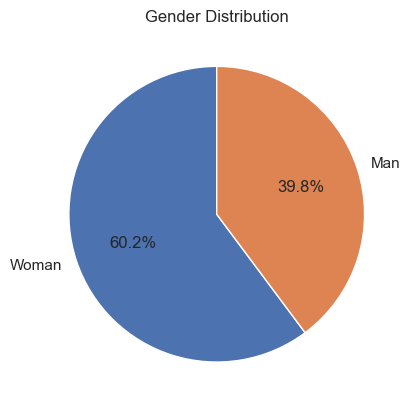

In [5]:
# Figure 1 - Percentage of gender distribution

# Filtering the genders and printing absolute numbers
df_gender_filter = df_helpenglish['How do you identify yourself?'].value_counts()

# Creating the pie chart from the filter
plt.pie(
    df_gender_filter, 
    labels=df_gender_filter.index, 
    autopct='%1.1f%%', 
    startangle=90
)

# Displaying the chart
plt.title('Gender Distribution')
plt.show()

60.2% of students are women: this suggests that marketing campaigns should be more targeted toward female audiences. Creating content that resonates with women or addressing their specific needs and motivations for learning English could increase enrollment rates further.

#### Now, the age:


In [6]:
# Transforming the column into a datetime df
df_helpenglish["What's your birthday?"] = pd.to_datetime(
    df_helpenglish["What's your birthday?"], 
    format='%d/%m/%Y', 
    errors='coerce'
)

# Function to calculate the age
def calculate_age(birthdate:datetime) -> int:
    if pd.isnull(birthdate):
        return None
    today = datetime.now()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

# Creating a new column named 'Age'
df_helpenglish['Age'] = df_helpenglish["What's your birthday?"].apply(calculate_age)

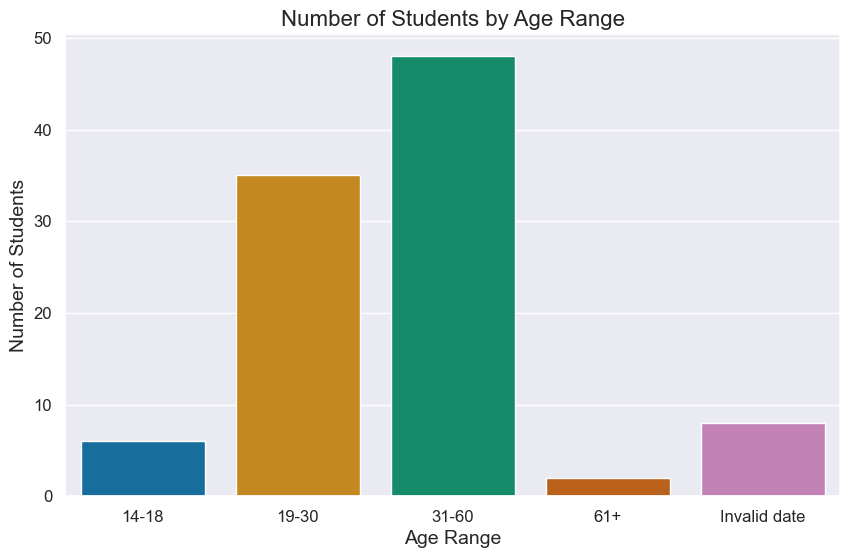

In [7]:
# Function to create an age range structure
def get_age_range(age: int) -> str:
    if 14 <= age <= 18:
        return "14-18"
    elif 19 <= age <= 30:
        return "19-30"
    elif 31 <= age <= 60:
        return "31-60"
    elif age >= 61:
        return "61+"
    else:
        return "Invalid date"

# Creating a new column into the dataframe
df_helpenglish['Age Range'] = df_helpenglish['Age'].apply(get_age_range)

# Counting the number of students in determined age range structure
age_range_counts = df_helpenglish['Age Range'].value_counts().sort_index()

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x=age_range_counts.index, 
    y=age_range_counts.values, 
    palette='colorblind'
)

# Customizing the chart
plt.title('Number of Students by Age Range', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Displaying the plot
plt.show()

As the data illustrates, the majority of the students are adults, predominantly within the 31-60 age range. This demographic is likely managing work, family, and other responsibilities, which suggests that offering flexible class schedules, online learning options, and courses tailored to career advancement would be particularly appealing to them.

Additionally, to address the first question, we can apply a filter based on <strong>occupation</strong> to analyze the diverse <strong>professional backgrounds </strong> of our students.

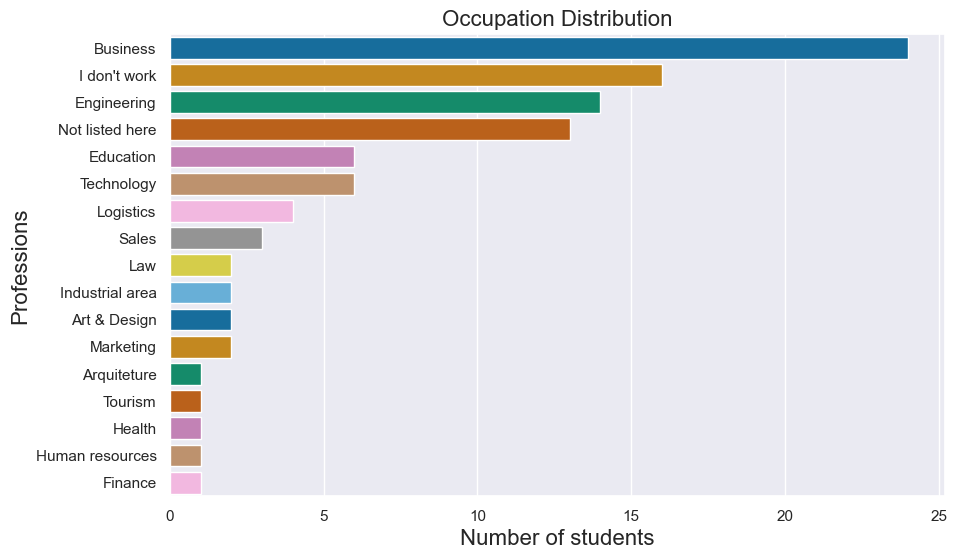

In [8]:
# Filtering the data
df_occupation = df_helpenglish["What's your occupation?"].value_counts()

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(
    x=df_occupation.values, 
    y=df_occupation.index, 
    palette='colorblind'
)

# Customizing the chart
plt.title('Occupation Distribution', fontsize=16)
plt.xlabel('Number of students', fontsize=16)
plt.ylabel('Professions', fontsize=16)

# Displaying the plot
plt.show()

For those in business, specialized courses like Business English could be promoted. For those not working, emphasizing English as a tool for future employment or self-improvement could attract this demographic.

#### How many students have studied English before?

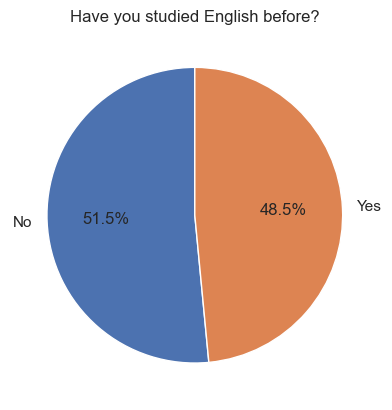

In [9]:
# Filtering the data
df_englishstudy = df_helpenglish['Have you studied English before?'].value_counts()

# Creating the pie chart from the filter
plt.pie(
    df_englishstudy, 
    labels=df_englishstudy.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Have you studied English before?')

# Displaying the plot
plt.show()

There’s a significant market for beginner courses. Marketing materials should emphasize the ease of starting with no prior knowledge, potentially offering free introductory sessions to draw in hesitant learners.

#### Where are the students from?

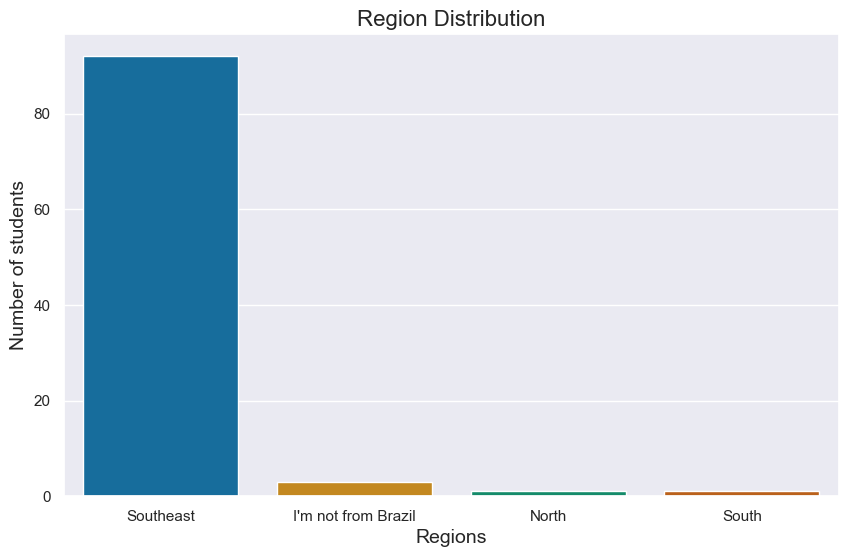

In [10]:
# Filtering the data
df_region = df_helpenglish['From what region of Brazil are you from?'].value_counts()

# creating the chart from the filter
plt.figure(figsize=(10,6))
sns.barplot(
    x=df_region.index,
    y=df_region.values, 
    palette='colorblind'
)

# Customizing the chart
plt.title('Region Distribution', fontsize=16)
plt.xlabel('Regions', fontsize=14)
plt.ylabel('Number of students', fontsize=14)

# Displaying the plot
plt.show()

Focus marketing efforts on this region, possibly by leveraging local events, partnerships with businesses, or regional online advertising. Highlighting the success stories of students from this area could also build trust and credibility.

Now, let's create a function to identify the cities where they come from with the help of an API. 

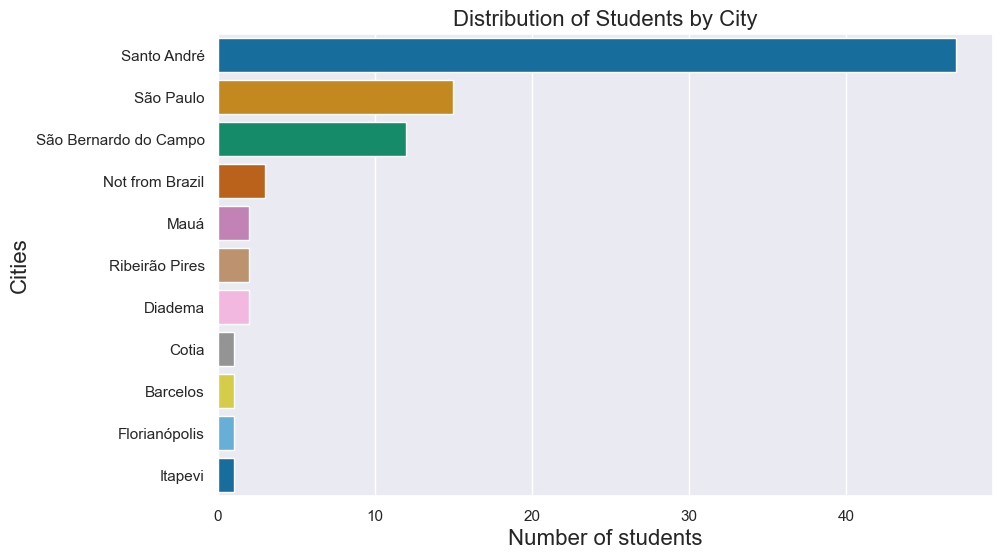

In [11]:
# Function to clean and format the ZIP code
def clean_zipcode(cep):
    if isinstance(cep, str):
        cleaned_cep = ''.join(filter(str.isdigit, cep))
        if len(cleaned_cep) == 8:
            return cleaned_cep
        elif any(char.isalpha() for char in cep):
            return 'Not from Brazil'
        else:
            return 'Invalid'
    else:
        return 'Invalid'

# Applying the cleaning function to the ZIP code column
df_helpenglish["Cleaned Zipcode"] = df_helpenglish["What's your zipcode?"].apply(clean_zipcode)

# Function to get the city from each ZIP code
def get_city_from_zipcode(zipcode):
    if zipcode in ['Invalid', 'Not from Brazil']:
        return zipcode
    try:
        response = requests.get(f'https://api.brasilaberto.com/v1/zipcode/{zipcode}')
        response.raise_for_status()  # Raise an error for bad responses
        data = response.json()
        return data.get('result', {}).get('city', 'Unknown')
    except requests.RequestException as e:
        return 'Invalid'

# Function to fetch city data for the entire DataFrame
def fetch_city_data(df):
    df['City'] = df['Cleaned Zipcode'].apply(get_city_from_zipcode)
    return df

# Applying the function to the DataFrame
df = fetch_city_data(df_helpenglish)

# Filtering out 'Unknown' and 'Invalid' values from the DataFrame
df_filtered = df[~df['City'].isin(['Unknown', 'Invalid'])]

# Counting the name of cities
df_cities = df_filtered['City'].value_counts()

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(
    x=df_cities.values, 
    y=df_cities.index, 
    palette='colorblind'
)

# Customizing the chart
plt.title('Distribution of Students by City', fontsize=16)
plt.xlabel('Number of students', fontsize=16)
plt.ylabel('Cities', fontsize=16)

# Displaying the plot
plt.show()

As shown in the chart, Santo André emerges as the most frequently mentioned city, which aligns with HelpEnglish's origins there. Word-of-mouth was—and remains—one of the most effective marketing strategies for the school.

However, São Paulo and São Bernardo also rank highly on the list, indicating the school's expanding influence. It is strongly recommended to continue investing in targeted publicity throughout the greater São Paulo region to capitalize on this growth.

### "What is the most common period for enrollments and inquiries about classes?"

For this analysis, a new DataFrame will be utilized, which includes data on the months of enrollments and inquiries.

In [12]:
# Creating a function to create a chart for each year
def plot_inquiries_enrollments(data):
    # Creating a chart
    plt.figure(figsize=(12, 6))
    
    # Plotting Inquiries
    bar_plot = sns.barplot(
        x='Months', 
        y='Inquiries', 
        data=data, 
        color='blue', 
        label='Inquiries'
    )
    
    # Plotting Enrollments
    bar_plot = sns.barplot(
        x='Months', 
        y='Enrollments', 
        data=data, 
        color='green', 
        label='Enrollments', 
        alpha=0.7
    )
    
    # Adding labels and title
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()

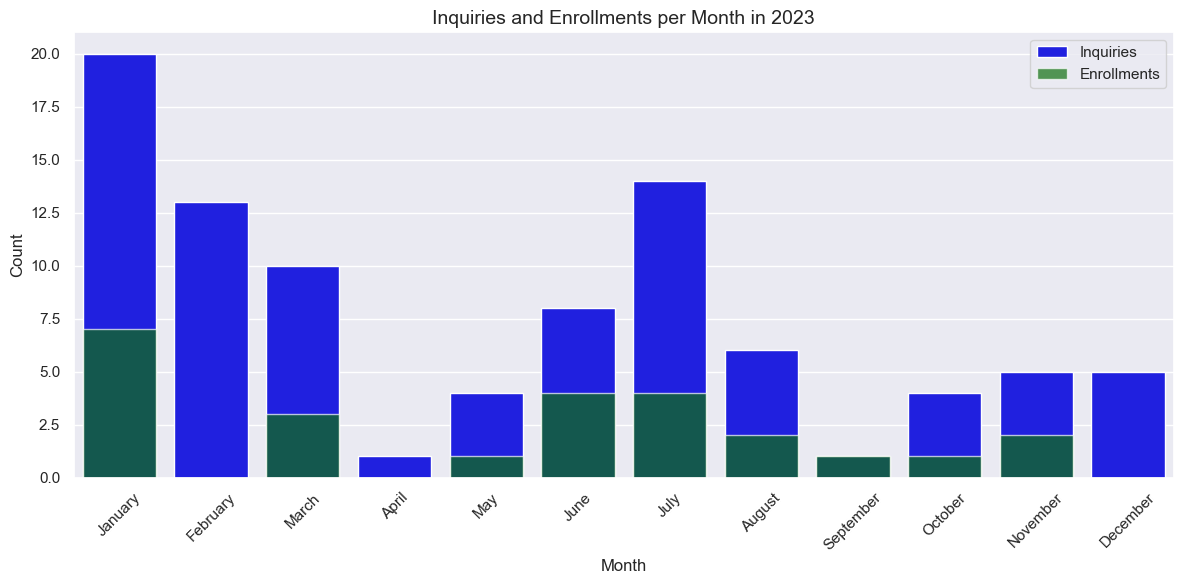

In [13]:
# Reading the data from 2023
enrollment_inquiries_2023 = pd.read_excel('enrollments_data_2023.xlsx')

# Calling our function with the data above
plot_inquiries_enrollments(enrollment_inquiries_2023)

# Displaying the plot
plt.title('Inquiries and Enrollments per Month in 2023', fontsize=14)
plt.tight_layout()
plt.show()

In 2023, we observed a substantial number of class inquiries in January and July. However, the number of enrollments did not correspondingly match the volume of inquiries.

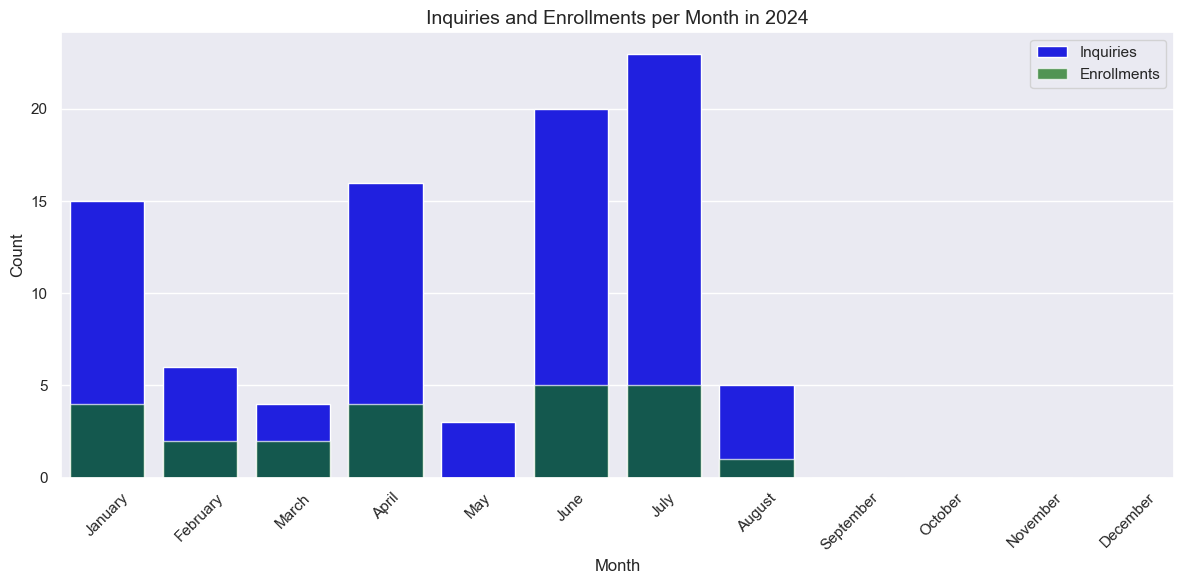

In [14]:
# Reading the data from 2024
enrollment_inquiries_2024 = pd.read_excel('enrollments_data_2024.xlsx')

# Calling our function with the data above
plot_inquiries_enrollments(enrollment_inquiries_2024)

# Displaying the plot
plt.title('Inquiries and Enrollments per Month in 2024', fontsize=14)
plt.tight_layout()
plt.show()

This analysis is being done in the 20th of August, thus, at the time of this analysis, June and July emerged as the months with the highest number of inquiries. Notably, April also saw a significant increase in student interest, marking a stark contrast from the trends observed in 2023.

Now, let's see both information together in a single chart.

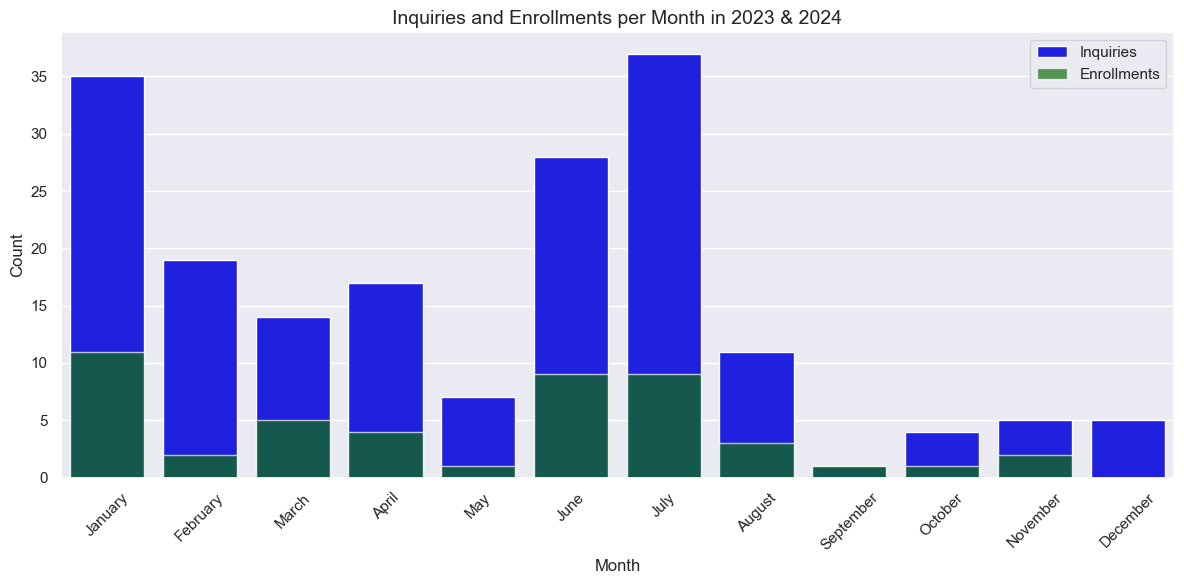

In [15]:
# Merging the two dataframes
combined_enrollment_inquiries = pd.concat([enrollment_inquiries_2023, enrollment_inquiries_2024])

# Grouping by months and making the sum of inquiries and enrollments
total_enrollment_inquiries = combined_enrollment_inquiries.groupby('Months').agg({'Inquiries': 'sum', 'Enrollments': 'sum'}).reset_index()

# Defining the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Converting the 'Months' column to a categorical type with the specified order
total_enrollment_inquiries['Months'] = pd.Categorical(total_enrollment_inquiries['Months'], categories=month_order, ordered=True)

# Sorting the DataFrame by the 'Months' column
total_enrollment_inquiries = total_enrollment_inquiries.sort_values('Months').reset_index(drop=True)

# Calling our function with the data above
plot_inquiries_enrollments(total_enrollment_inquiries)

# Displaying the plot
plt.title('Inquiries and Enrollments per Month in 2023 & 2024', fontsize=14)
plt.tight_layout()
plt.show()

Despite the differences between the two years, January, June, and July consistently show the highest levels of inquiries and enrollments. These months should be targeted with aggressive marketing campaigns, special offers, or seasonal promotions to capitalize on the increased interest.

#### What is the Most Common Period for Drop-Outs?

The data presented here was collected over the years 2020, 2021, 2022, 2023, and 2024. This visualization will be extremely valuable for the school’s owners, as it will provide insights into when students are most likely to drop out of the course.

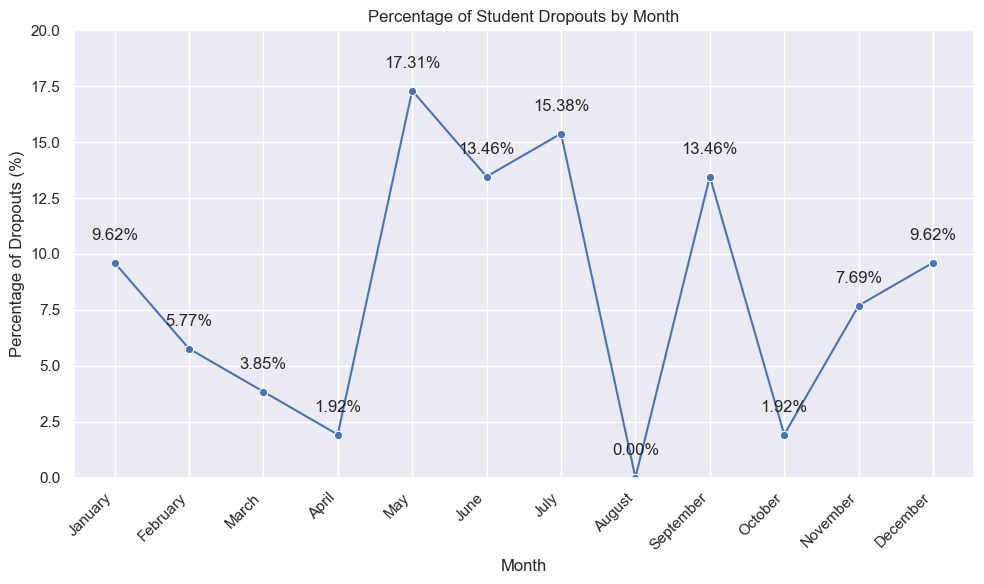

In [16]:
# Transforming our column into a datetime one, and cleaning the "NaN" values for students who are still enrolled
df_helpenglish['Course withdrawal date'] = pd.to_datetime(
    df_helpenglish['Course withdrawal date'], 
    format='%d/%m/%Y', 
    errors='coerce'
)

# Creating a copy of the Dataframe because we will exclude some rows
df_helpenglish_copy = df_helpenglish.copy()

# Removing the rows with NaNs
df_helpenglish_copy = df_helpenglish_copy.dropna(subset=['Course withdrawal date'])

# Extracting the month from 'Course withdrawal date' and making a new column
df_helpenglish_copy['Month'] = df_helpenglish_copy['Course withdrawal date'].dt.strftime('%B')

# Counting the number of dropouts per month and calculating the percentages
dropouts_per_month = df_helpenglish_copy['Month'].value_counts(normalize=True).sort_index() * 100

# Creating an order of months for the chart and filling "0" cases if needed
month_order = [
    'January', 
    'February', 
    'March', 
    'April', 
    'May', 
    'June', 
    'July', 
    'August', 
    'September', 
    'October', 
    'November', 
    'December'
]
dropouts_per_month = dropouts_per_month.reindex(month_order, fill_value=0)

# Creating the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=dropouts_per_month.index, 
    y=dropouts_per_month.values, 
    marker='o', 
    linestyle='-', 
    color='b'
)

# Adding labels, a title, a limit percentage for display purposes, and a rotation for "cluttering" purposes
plt.xlabel('Month')
plt.ylabel('Percentage of Dropouts (%)')
plt.title('Percentage of Student Dropouts by Month')
plt.ylim(0, 20)
plt.xticks(rotation=45, ha='right')

# Showing the percentage values in each point for better display
for index, value in enumerate(dropouts_per_month.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Displaying the plot
plt.tight_layout()
plt.show()

### Why does this happen?

After analyzing the line chart, we observe that peak periods for drop-outs occur between May and September, with a notable absence of recorded drop-outs in August across the four years of data. While the data does not specify the reasons for these drop-outs, several inferences can be made:

1. **New Year’s Resolutions**: The beginning of the year often sees a surge in new year’s resolutions and a heightened sense of motivation for personal development. This period may encourage students to start the year with renewed commitment and goals.

2. **Brazilian Winter Break**: The winter break from June to July, when many students are on vacation, could significantly disrupt routines and affect attendance. This extended break often alters both students’ and parents’ schedules, contributing to an increase in drop-outs during this period.

3. **End-of-Year Factors**: November and December also exhibit higher drop-out rates, likely due to the approaching new year. During these months, individuals may focus on holiday preparations, such as Christmas, and budgetary concerns related to holiday expenses. Additionally, the exhaustion from a long year of work may impact students’ engagement and retention.

These insights can help the school better understand and address the factors contributing to student drop-outs throughout the year.

The next step is to gather more information on the reasons behind student drop-outs during these periods. One effective approach would be to create a dedicated form for students who decide to withdraw. This form would allow students to provide detailed feedback on their reasons for dropping out, offering valuable insights into the underlying issues.

Implementing this form could facilitate a better understanding of student challenges and help the school develop targeted strategies to improve retention and address specific concerns.



## Miscellaneous information about HelpEnglish Students which can also help

This section is aimed to answer some basic questions regarding the school in general.

#### Numbers of teachers?

How are the student's distributed among the HelpEnglish teachers?

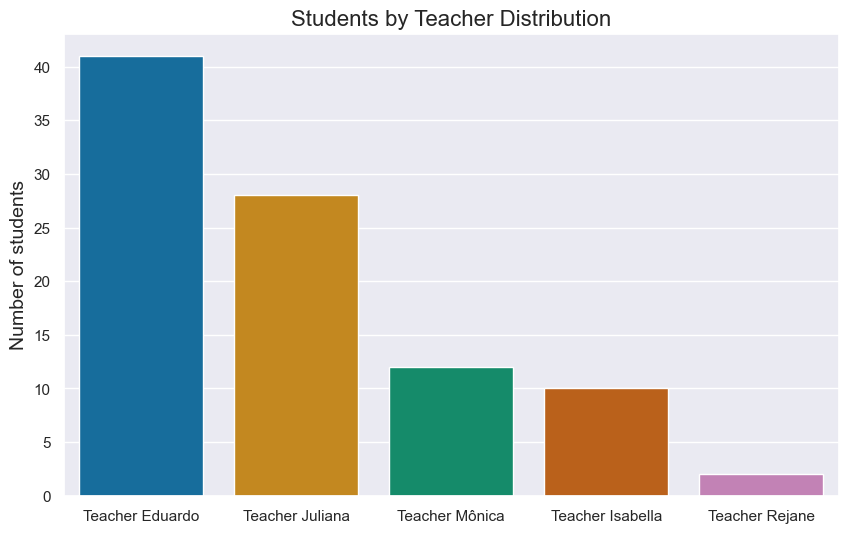

In [17]:
# Filtering the data
df_teacher_count =  df_helpenglish['Do you know who your teacher will be? '].value_counts()

# Creating the chart from the filter
plt.figure(figsize=(10,6))
sns.barplot(
    x=df_teacher_count.index,
    y=df_teacher_count.values, 
    palette='colorblind'
)

# Customizing the chart
plt.title('Students by Teacher Distribution', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Number of students', fontsize=14)

# Displaying the plot
plt.show()

#### How do students pay for the course?

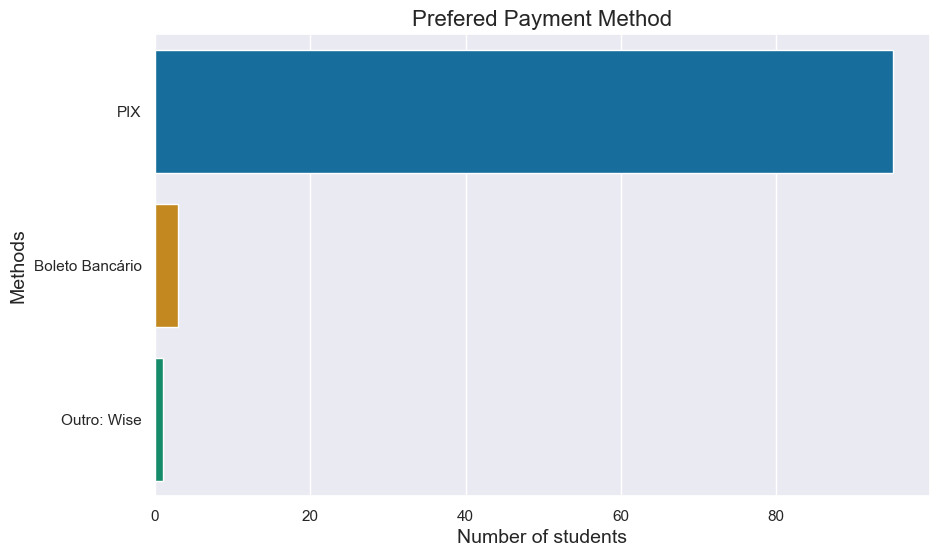

In [18]:
# Filtering the data
df_payment_method = df_helpenglish['Prefered payment method'].value_counts()

# Creating the chart from the filter
plt.figure(figsize=(10,6))
sns.barplot(
    x=df_payment_method.values,
    y=df_payment_method.index, 
    palette='colorblind'
)

# Customizing the chart
plt.title('Prefered Payment Method', fontsize=16)
plt.xlabel('Number of students', fontsize=14)
plt.ylabel('Methods', fontsize=14)

# Displaying the plot
plt.show()

# Building the HelpEnglish Persona

## Persona 1: Maria Silva

<img src="image_repository/storytelling_helpenglish/persona.jpg" style="width:800px; display:block; margin:auto; padding:10px;"/>


**Age:** 38  
**Gender:** Female  
**Location:** São Paulo city, São Paulo, Southeast Brazil  
**Occupation:** Project Manager in a multinational company  
**Education Level:** Bachelor's Degree in Business Administration  
**Income Level:** Upper-middle class  
**Marital Status:** Married, with two children  
**English Proficiency:** Beginner  
**Learning Motivation:** Professional growth, be able to have conversations with foreign clients, and skills to read and understand complex texts in her area of work.

### Learning Motivation:
- **Career advancement**
- **Traveling abroad**

### Background:
Maria is a driven professional who manages projects at a multinational company. Her work often involves communicating with international colleagues, which has made her realize the importance of improving her English skills. Although she learned some English at school, she never had the opportunity to practice it regularly, so she considers herself a beginner.
Maria is also motivated to learn English to help her children with their schoolwork and to prepare for family vacations abroad. She wants to feel more confident in her language abilities, especially in business settings where English proficiency is important.

### Goals:
- **Career Advancement:** Improve her English to secure promotions and handle international projects more effectively.
- **Personal Development:** Gain confidence in English to help her children with their studies and make the most out of family trips abroad.
- **Flexible Learning:** Due to her busy schedule, she needs courses that offer flexible learning options, such as online classes and personalized study plans.

### Frustrations:
- **Time Constraints:** Balancing a demanding job and family responsibilities leaves Maria with limited time for language learning.
- **Lack of Practice:** As a beginner, Maria is self-conscious about her speaking skills and needs a supportive environment to practice without feeling embarrassed.
- **Motivation:** During busy periods at work, Maria's motivation to attend classes might wane, especially if the course content feels too generic or irrelevant to her professional needs.

### Marketing Messaging to Maria:
- **"Achieve Your Career Goals with English":** Position English learning as a critical skill for professional growth, emphasizing how it can open doors to new opportunities.
- **"Flexible Learning for Busy Professionals":** Highlight the flexibility of online classes, personalized learning paths, and how HelpEnglish can fit into her hectic schedule.
- **"Gain Confidence in Every Conversation":** Focus on building her confidence in speaking English, with a particular emphasis on real-world scenarios she encounters in her work and daily life.

### Preferred Channels:
- **Social Media:** LinkedIn for professional growth content; Facebook and Instagram for community and family-oriented messages.

## Persona 2: Gabriel Pereira

<img src="image_repository/storytelling_helpenglish/persona2.jpeg" style="width:800px; display:block; margin:auto; padding:10px;"/>


**Age:** 31  
**Gender:** Male  
**Location:** São Bernardo do Campo, São Paulo, Southeast Brazil  
**Occupation:** Mechanical Engineer at a Technology Startup  
**Education Level:** Bachelor's Degree in Mechanical Engineering  
**Income Level:** Middle class  
**Marital Status:** Married, with 1 child  
**English Proficiency:** Intermediate  
**Learning Motivation:** Professional growth, preparing for potential international job opportunities, and improving technical communication.

### **Background:**
Gabriel is a young and ambitious mechanical engineer working at an already big company at the market. He is deeply involved in technical projects that require clear communication with international partners and clients. Although Gabriel studied English during his university years and has an intermediate level of proficiency, he feels the need to enhance his language skills to advance his career and be more effective in his role. Gabriel is particularly focused on mastering technical vocabulary and improving his spoken English to excel in presentations and meetings.

### **Goals:**
- **Career Growth:** Gabriel wants to improve his English to take on more responsibilities at work, especially in roles that involve international collaboration.FJ
- **Technical Mastery:** He aims to enhance his technical English to better understand and communicate complex engineering concepts.
- **Global Opportunities:** Gabriel is interested in exploring job opportunities abroad and wants to be fully prepared for the language demands of working in an international setting.

### **Frustrations:**
- **Time Management:** Gabriel's job is demanding, often requiring long hours, which makes it challenging for him to find time for consistent language learning.
- **Specific Needs:** His focus on technical English means he needs targeted lessons that align with his field, rather than general language courses, which private classes can help, since teachers can create a personalized class.
- **Retention:** Due to the demaniding routine, Gabriel sometimes struggles with retaining new vocabulary, especially technical terms, and seeks methods to improve long-term retention.

### **Marketing Messaging:**
- **"Accelerate Your Engineering Career with English":** Emphasize the importance of English proficiency in advancing within the engineering field, particularly for international roles due to the high number of multinational companies related to this area of work.
- **"Flexible Learning for the Modern Engineer":** Promote the flexibility of online classes and personalized study plans that fit into Gabriel's busy schedule.

### **Preferred Channels:**
- **Social Media:** LinkedIn for professional content and networking; YouTube for tutorials and technical English lessons.

## Persona 3: Yasmin Mendes

<img src="image_repository/storytelling_helpenglish/persona3.jpg" style="width:700px; display:block; margin:auto; padding:10px;"/>


**Age:** 19  
**Gender:** Female  
**Location:** Santo André, São Paulo, Southeast Brazil  
**Occupation:** University Student  
**Education Level:** Undergraduate Student in International Relations  
**Income Level:** Middle class  
**Marital Status:** Single  
**English Proficiency:** Elementary 
**Learning Motivation:** Preparing for study abroad opportunities, traveling, and exploring different cultures  

### **Background:**  
Yasmin is a young and ambitious student currently pursuing a degree in International Relations. She has always been fascinated by different cultures and dreams of studying abroad, particularly in an English-speaking country. Although she has a decent understanding of English, Yasmin is determined to improve her proficiency to ensure she can fully immerse herself in a new environment. She is excited about the idea of living abroad, making new friends, and experiencing life in a different country.

### **Goals:**  
- **Study Abroad:** Yasmin wants to enhance her English to meet the language requirements for exchange programs and scholarships.
- **Cultural Exploration:** She is eager to travel and explore different cultures, using English as a tool to communicate and navigate in foreign countries.
- **Personal Growth:** Yasmin sees learning English as a key step in her personal development, helping her gain independence and confidence.

### **Frustrations:**  
- **Limited Experience:** Yasmin is still relatively new to the world of travel and may feel nervous about navigating a foreign country on her own.
- **Balancing Studies:** As a full-time student, she needs to manage her academic responsibilities alongside her language learning.
- **Financial Constraints:** Being a student, Yasmin may have limited financial resources, which could impact her ability to invest in high-quality language courses.

### **Marketing Messaging:**  
- "Unlock Your Global Future": Emphasize how mastering English can open doors to international opportunities, including study abroad programs.
- "Explore the World with Confidence": Highlight the importance of English in making her travel experiences more enriching and less intimidating.
- "Invest in Your Dreams": Position English learning as an essential investment in her future, helping her achieve her dreams of living and studying abroad.

### **Preferred Channels:**  
- **Social Media:** Instagram and TikTok for engaging, travel-related content that resonates with young adults.
- **Webinars:** Online sessions focused on preparing for life abroad, including language preparation and cultural adaptation tips.

## Conclusion


The data suggests that HelpEnglish's marketing efforts should be more focused on attracting and retaining students in the 31-60 age range, especially women. Campaigns should be tailored to their busy lifestyles and professional needs, particularly for those in business-related fields. Given the high percentage of beginners, emphasizing the accessibility of English learning and providing strong regional campaigns in the southeast region of Brazil will likely yield positive results. Moreover, addressing the dropout trend during May to July with targeted interventions could improve student retention and overall satisfaction.

Regarding the dropouts, understanding the reasons behind the dropouts is crucial. It could be due to a seasonal dip in motivation, personal issues, or dissatisfaction with the course. Addressing these issues by improving course content, providing additional support during this period, or offering re-engagement strategies could help reduce dropout rates.

Introducing a "dropout form" is an excellent strategy. This form could collect valuable feedback on why students decide to leave, providing insights into any patterns or common issues that could be addressed. Understanding these reasons more deeply can help in refining the school's offerings, improving student retention, and potentially identifying areas for growth or new services that align with student needs.

In summary, HelpEnglish is a thriving online private language school that continues to grow each year. However, to fully capitalize on this growth, there is a clear need for more comprehensive student data, like: skills, hobbies, channels, motivations and frustrations. This data will be essential to addressing key marketing questions and tailoring strategies to enhance student engagement and retention